Skimage ou Scikit-image, est un package Python open source conçu pour le prétraitement d'image. Nous allons beaucoup utilisé Scikit-image2 qui est une bibliothèque libre comprenant une large collection d'algorithme pour le traitement d'images en Python.

<class 'numpy.ndarray'>


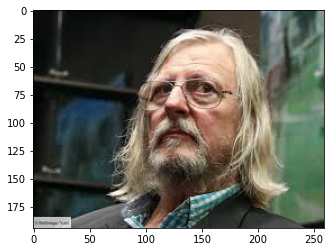

In [12]:
#Insertion image

from skimage import io

didier = io.imread('didounet.jpg')

print(type(didier))
plt.imshow(didier);

Premierement on récupère et on insère une image en local de cette façon.

I) Manipulation des canaux d'exposition et de couleur

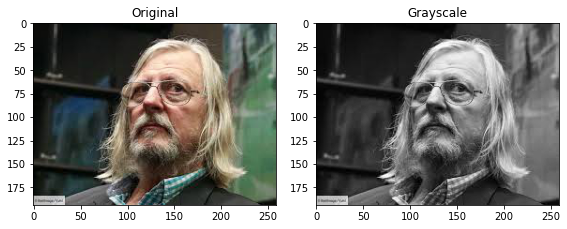

In [9]:
import matplotlib.pyplot as plt

from skimage.color import rgb2gray

original = io.imread('didounet.jpg')
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

Cet exemple convertit une image avec des canaux RVB en une image avec un seul canal de niveaux de gris.
La valeur de chaque pixel en niveaux de gris est calculée comme la somme pondérée des pixels rouges, verts et bleus correspondants

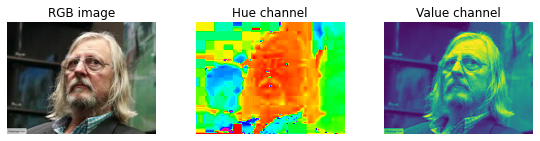

In [11]:
from skimage.color import rgb2hsv


rgb_img = io.imread('didounet.jpg')
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

Ici, on montre comment la conversion RVB en HSV (Teinte, Saturation, Valeur) peut être utilisée pour faciliter les processus de segmentation.

Habituellement, les objets dans les images ont des couleurs (teintes) et des luminosités distinctes, de sorte que ces caractéristiques peuvent être utilisées pour séparer différentes zones de l'image. Dans la représentation RVB, la teinte et la luminosité sont exprimées comme une combinaison linéaire des canaux R, V, B, alors qu'elles correspondent à des canaux uniques de l'image HSV (les canaux Teinte et Valeur). Une simple segmentation de l'image peut alors être effectivement réalisée par un simple seuillage des canaux HSV.

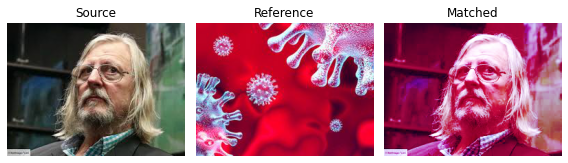

In [21]:
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = io.imread('covid_19.jpeg')
image = io.imread('didounet.jpg')

matched = match_histograms(image, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

Cet exemple illustre la fonctionnalité de correspondance d'histogramme. Il manipule les pixels d'une image d'entrée afin que son histogramme corresponde à l'histogramme de l'image de référence. Si les images ont plusieurs canaux, l'appariement est effectué indépendamment pour chaque canal, tant que le nombre de canaux est égal dans l'image d'entrée et la référence.

La correspondance d'histogramme peut être utilisée comme une normalisation légère pour le traitement d'image, telle que la correspondance de caractéristiques, en particulier dans des circonstances où les images ont été prises à partir de différentes sources ou dans des conditions différentes (par exemple, l'éclairage).

In [29]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters

image = io.imread('didounet.jpg')

@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)


@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)

Il existe de nombreux filtres conçus pour fonctionner avec des images en niveaux de gris, mais pas avec des images en couleur. Pour simplifier le processus de création de fonctions pouvant s'adapter aux images RVB, scikit-image fournit le décorateur adapt_rgb.

Pour utiliser réellement le décorateur adapt_rgb, vous devez décider comment vous souhaitez adapter l'image RVB pour une utilisation avec le filtre d'échelle de gris. Il existe deux gestionnaires prédéfinis:

each_channel
Passez chacun des canaux RVB au filtre un par un et recousez les résultats dans une image RVB.

hsv_value
Convertissez l'image RVB en HSV et transmettez le canal de valeur au filtre. Le résultat filtré est réinséré dans l'image HSV et reconverti en RVB.

Text(0.5, 1.0, 'Sobel filter computed\n on (V)alue converted image (HSV)')

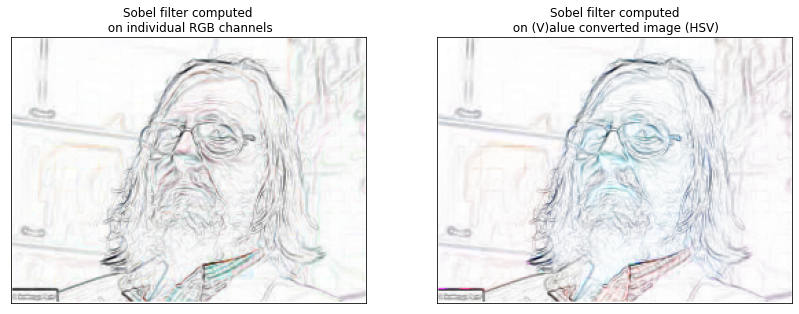

In [30]:
from skimage.exposure import rescale_intensity

fig, (ax_each, ax_hsv) = plt.subplots(ncols=2, figsize=(14, 7))

ax_each.imshow(rescale_intensity(1 - sobel_each(image)))
ax_each.set_xticks([]), ax_each.set_yticks([])
ax_each.set_title("Filtre Sobel calculé \n sur des canaux RVB individuels")

ax_hsv.imshow(rescale_intensity(1 - sobel_hsv(image)))
ax_hsv.set_xticks([]), ax_hsv.set_yticks([])
ax_hsv.set_title("Filtre Sobel calculé \n sur une image convertie en valeur (HSV)")

Nous pouvons utiliser ces fonctions comme nous les utiliserions normalement, mais elles fonctionnent désormais avec des images en niveaux de gris (image de gauche) et en couleur (image de droite).

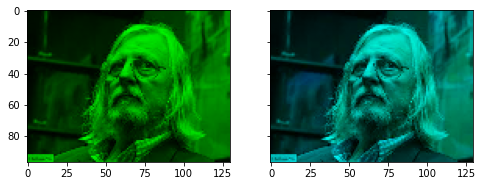

In [34]:
from skimage import color
from skimage import img_as_float

grayscale_image = img_as_float(io.imread('didounet.jpg')[::2, ::2])
image = color.gray2rgb(grayscale_image)

green_multiplier = [0, 1, 0]
cyan_multiplier = [0, 1, 1]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4),
                               sharex=True, sharey=True)
ax1.imshow(green_multiplier * image)
ax2.imshow(cyan_multiplier * image)

Il peut être utile de teinter artificiellement une image avec une certaine couleur, soit pour mettre en évidence des régions particulières d'une image ou peut-être simplement pour animer une image en niveaux de gris. Cet exemple illustre la teinte de l'image en mettant à l'échelle les valeurs RVB et en ajustant les couleurs dans l'espace colorimétrique HSV.

En 2D, les images couleur sont souvent représentées en RVB - 3 couches de tableaux 2D, où les 3 couches représentent les canaux (R) ed, (G) reen et (B) lue de l'image. Le moyen le plus simple d'obtenir une image teintée est de définir chaque canal RVB sur l'image en niveaux de gris mise à l'échelle par un multiplicateur différent pour chaque canal (green_multiplier = [0, 1, 0]). Par exemple, multiplier les canaux rouge et bleu par 0 ne laisse que le canal vert et produit une image verte. De même, la remise à zéro du canal rouge ne laisse que les canaux vert et bleu, qui se combinent pour former du cyan.

II) Transformations géométriques

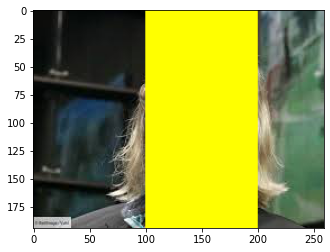

In [71]:
#Rajout d'un rectangle jaune

didier[0:194, 100:200, :] = [255, 255, 0]  # [red, green, blue]
plt.imshow(didier);

Ici, on fait apparaître un rectangle jaune pour cacher le visage présent sur l'image.
Le jaune est crée à partir des trois canaux de couleur : dans l’ordre R, V, B (rouge vert bleu).
Ce jaune correspond au triplet (R, V, B) = (255, 255, 0), c'est à dire l'utilisation du rouge et du vert.
"[0:194, 100:200, :]]" correspond aux coordonnées pour la placer ce rectangle.

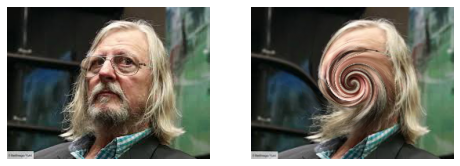

In [74]:
#import matplotlib.pyplot as plt
#from skimage import data
from skimage.transform import swirl


image = io.imread('didounet.jpg')
swirled = swirl(image, rotation=0, strength=10, radius=120)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                               sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')

plt.show()

Le tourbillon mage est une déformation d'image non linéaire qui crée un effet tourbillon. Cet exemple décrit l'implémentation de cette transformation dans skimage, ainsi que le mécanisme de déformation sous-jacent.

Déformation d'image :
Lors de l'application d'une transformation géométrique sur une image, nous utilisons généralement un mappage inversé, c'est-à-dire que pour chaque pixel de l'image de sortie, nous calculons sa position correspondante dans l'entrée. La raison en est que, si nous procédons à l'inverse (mappez chaque pixel d'entrée à sa nouvelle position de sortie), certains pixels de la sortie peuvent rester vides. D'autre part, chaque coordonnée de sortie a exactement un emplacement correspondant dans (ou à l'extérieur) de l'image d'entrée, et même si cette position n'est pas un entier, nous pouvons utiliser l'interpolation pour calculer la valeur d'image correspondante.

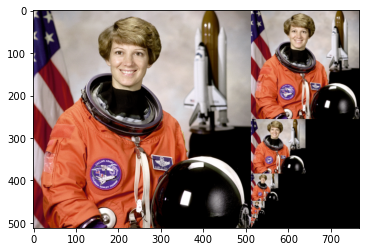

In [83]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import pyramid_gaussian


image = data.astronaut()
rows, cols, dim = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2, multichannel=True))

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()

Dans cet exemple nous utilisons l'image "astrononaut" présente dans la bibiolothèque Scikit-image2.
La fonction pyramid_gaussian prend une image et produit des images successives rétrécies d'un facteur d'échelle constant. Les pyramides d'images sont souvent utilisées, par exemple, pour implémenter des algorithmes de débruitage, de discrimination de texture et de détection invariante d'échelle.

Nota Bene : Il est possible de récupérer des images depuis des bibliothèques comme l'exemple et dessus.
Ci-dessous, on peut voir afficher plusieurs images "scientifiques" :

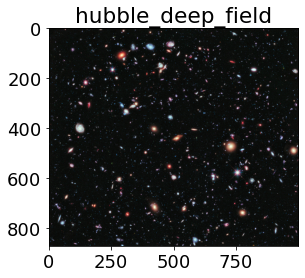

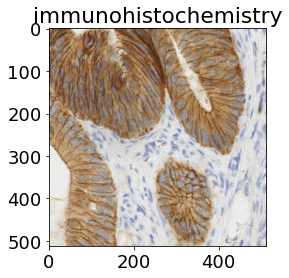

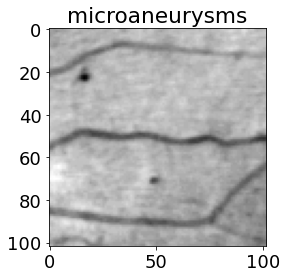

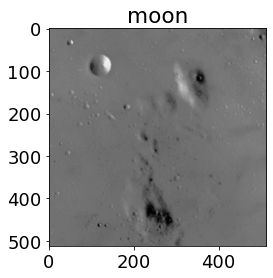

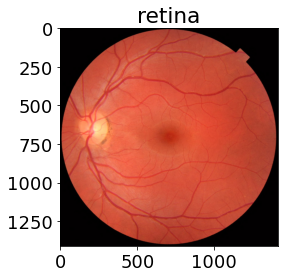

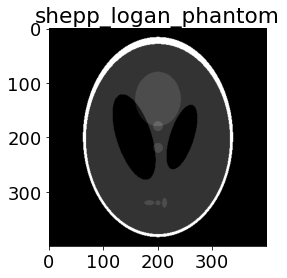

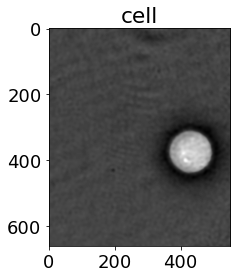

In [86]:
import matplotlib.pyplot as plt
import matplotlib

from skimage import data

matplotlib.rcParams['font.size'] = 18

images = ('hubble_deep_field',
          'immunohistochemistry',
          'microaneurysms',
          'moon',
          'retina',
          'shepp_logan_phantom',
          'cell',
          )


for name in images:
    caller = getattr(data, name)
    image = caller()
    plt.figure()
    plt.title(name)
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)

plt.show()

III) Filtrage et restauration

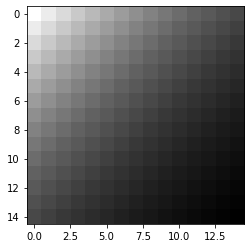

In [8]:
# Reglage du niveau de gris

plt.imshow(R, cmap='gray', interpolation='nearest');

Ici on sépare en pleins de petit carré qu'on colore petite à petit avec une interpolation. On constate bien le contraste du niveau de gris.

lin1: float64 1.0 255.0
lin2: uint8 1 255


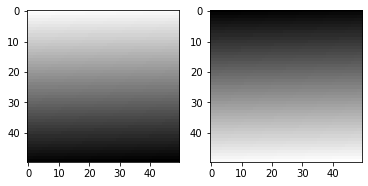

In [13]:
lin1 = np.linspace(255, 1, 2500).reshape((50, 50))
lin2 = np.linspace(1, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("lin1:", lin1.dtype, lin1.min(), lin1.max())
print("lin2:", lin2.dtype, lin2.min(), lin2.max())

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(lin1, cmap='gray')
ax1.imshow(lin2, cmap='gray');

On effectue le réglage du niveau de gris de haut en bas.

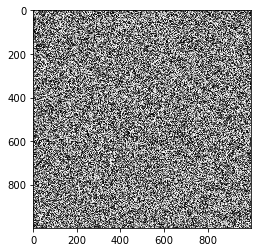

In [1]:
#Image aléatoire avec bruit

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
random_image = np.random.random([999, 999])
plt.imshow(random_image, cmap='gray', interpolation='nearest');

In [ ]:
Ici on génère une image aléatoire de bruit.

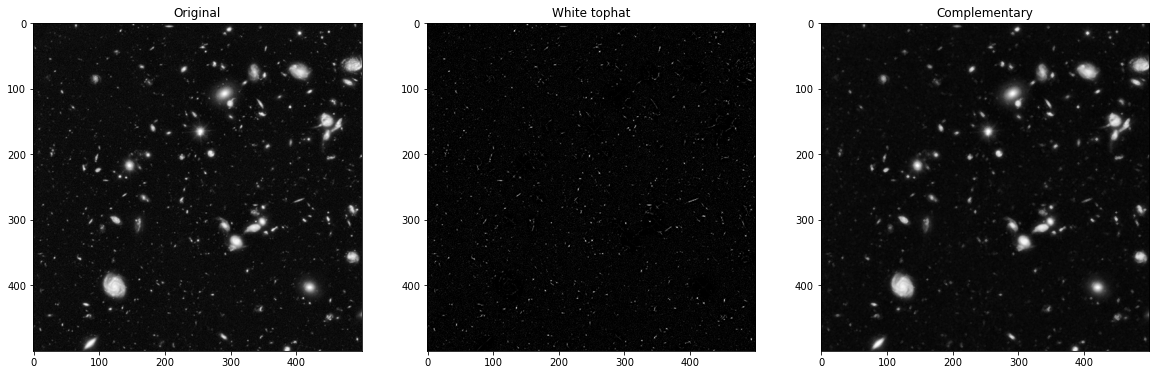

In [84]:
#import numpy as np
#import matplotlib.pyplot as plt
#from skimage import data
from skimage import color, morphology

image = color.rgb2gray(data.hubble_deep_field())[:500, :500]

selem =  morphology.disk(1)
res = morphology.white_tophat(image, selem)

fig, ax = plt.subplots(ncols=3, figsize=(20, 8))
ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(image - res, cmap='gray')

plt.show()

Image récupéré depuis la bibliothèque Scikit-image2.
Cet exemple montre comment supprimer de petits objets d'images en niveaux de gris. La transformation "top hat filter" est une opération qui extrait de petits éléments et des détails d'images données. Ici, nous utilisons une transformée blanche en "top hat filter", qui est définie comme la différence entre l'image d'entrée et son ouverture (morphologie mathématique).